C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


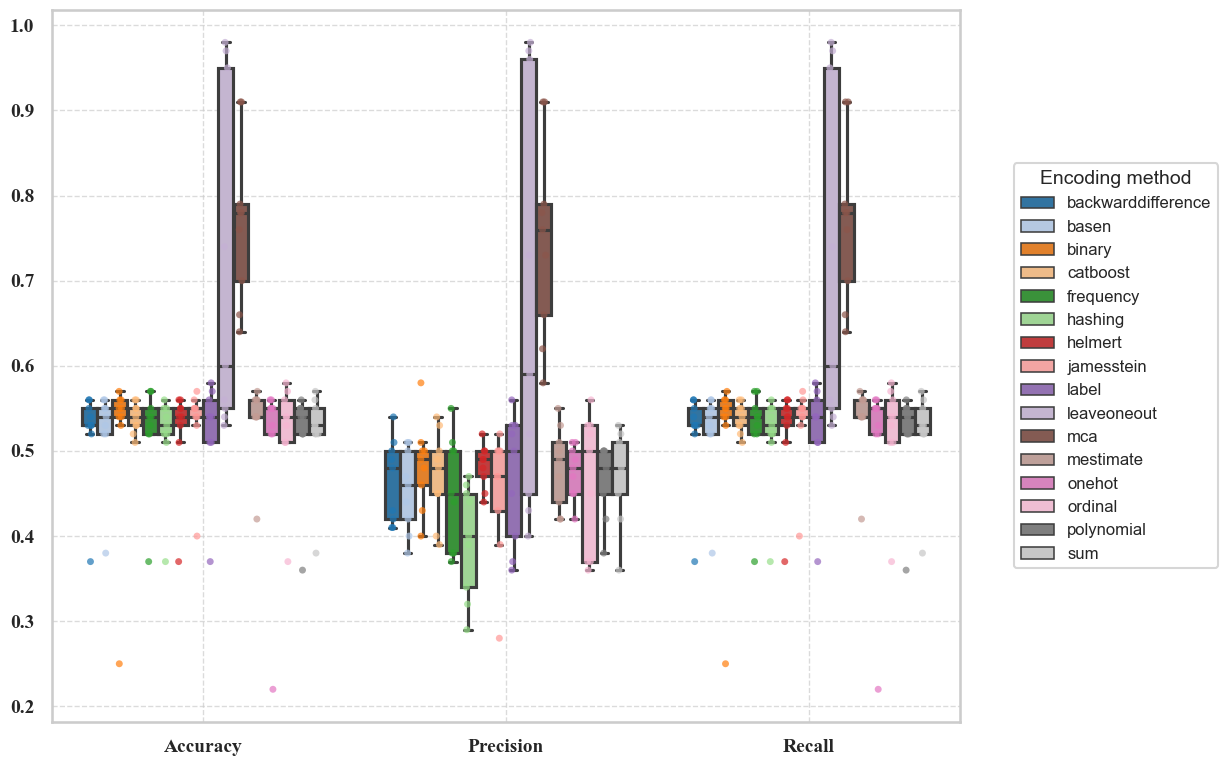

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Define the directory containing the score files
score_files_dir = "C:/Users/aim2r/Desktop/GUI/V1_code/metrics/"

# Function to extract metrics from each file
def extract_metrics(file_path):
    metrics_values = {}
    with open(file_path, 'r') as file:
        lines = file.readlines()
        current_method = None
        for line in lines:
            if "Encoding method:" in line:
                # Extract the encoding method name
                current_method = line.split(':')[1].strip().replace("_encoded.csv", "")
            elif current_method:  # Assuming similar structure for Accuracy, Precision, and Recall
                parts = line.split(':')
                metric_name = parts[0].strip()
                if metric_name in ['Average Accuracy', 'Average Precision', 'Average Recall']:  # Check if it's a relevant metric
                    metric_value = float(parts[1].strip())
                    if current_method not in metrics_values:
                        metrics_values[current_method] = {}
                    if metric_name not in metrics_values[current_method]:
                        metrics_values[current_method][metric_name] = []
                    metrics_values[current_method][metric_name].append(metric_value)
    return metrics_values

# List all score files in the directory that start with "scores"
score_files = [file for file in os.listdir(score_files_dir) if file.startswith("scores")]
all_metrics = {}

# Extract metrics from each file and collect them into a dictionary
for file in score_files:
    score_file_path = os.path.join(score_files_dir, file)
    metrics_values = extract_metrics(score_file_path)
    for method, metrics in metrics_values.items():
        if method in all_metrics:
            for metric_name, values in metrics.items():
                all_metrics[method].setdefault(metric_name, []).extend(values)
        else:
            all_metrics[method] = metrics

# Convert the dictionary to a DataFrame for plotting
data = []
for method, metrics in all_metrics.items():
    for metric_name, values in metrics.items():
        for value in values:
            data.append({'Method': method, 'Metric': metric_name.replace('Average ', ''), 'Value': value})  # Remove 'Average' prefix

df = pd.DataFrame(data)

# Set font globally for all elements
matplotlib.rc('font', family='Times New Roman')

# Custom color palette with 16 distinct colors
custom_palette = [
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', 
    '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5', 
    '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f', 
    '#c7c7c7'
]

sns.set_style("whitegrid")
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(15, 8))  # Create a figure and axis object
# Plot boxplot
box = sns.boxplot(x='Metric', y='Value', hue='Method', data=df, palette=custom_palette, showfliers=False, ax=ax)

# Plot jitter with colors matching the boxplot
jitter = sns.stripplot(x='Metric', y='Value', hue='Method', data=df, jitter=True, dodge=True, alpha=0.7, marker='o', palette=custom_palette, ax=ax)

# Remove labels and title
ax.set_xlabel('')  # Empty xlabel
ax.set_ylabel('')  # Empty ylabel
ax.set_title('')   # Empty title

# Customize ticks font directly
plt.xticks(fontname="Times New Roman", fontsize=14, fontweight='bold')
plt.yticks(fontname="Times New Roman", fontsize=14, fontweight='bold')

# Customize grid lines for fine dashed lines
ax.grid(True, linestyle='--', linewidth=1, alpha=0.7)  # Customize grid lines

# Handling legend: keep only one legend from boxplot and adjust its position
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(df['Method'].unique())], labels[:len(df['Method'].unique())], title='Encoding method', bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=12, title_fontsize=14)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout

# Save the figure with high resolution and ensure the whole figure including the legend is saved
plt.savefig('Fig1.png', dpi=600, bbox_inches='tight')  # Save as PNG with 600 dpi
plt.show()
